# Feature Distribution
This notebook explores the distribution of audio features from a sample of music data from the Free Music Archive (fma) that's cleaned and saved to "tracks_cleaned.csv".

## Exploring the Dataframe

In [1]:
%matplotlib inline

import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import ast


In [2]:
df = pd.read_csv('tracks_cleaned.csv', index_col='track_id')
df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,year_released,album,album_id,artist_id,artist,genres_top,genres_all_id,track,duration,genres_all
track_id,,,,,,,,,,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,2009.0,AWOL - A Way Of Life,1,1,AWOL,Hip-Hop,[21],Food,168.0,['Hip-Hop']
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,2009.0,AWOL - A Way Of Life,1,1,AWOL,Hip-Hop,[21],Electric Ave,237.0,['Hip-Hop']
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,2009.0,AWOL - A Way Of Life,1,1,AWOL,Hip-Hop,[21],This World,206.0,['Hip-Hop']
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008.0,Constant Hitmaker,6,6,Kurt Vile,Pop,[10],Freeway,161.0,['Pop']
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,2009.0,AWOL - A Way Of Life,1,1,AWOL,Hip-Hop,[21],Street Music,207.0,['Hip-Hop']


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 2 to 124911
Data columns (total 18 columns):
acousticness        13129 non-null float64
danceability        13129 non-null float64
energy              13129 non-null float64
instrumentalness    13129 non-null float64
liveness            13129 non-null float64
speechiness         13129 non-null float64
tempo               13129 non-null float64
valence             13129 non-null float64
year_released       13129 non-null float64
album               13129 non-null object
album_id            13129 non-null int64
artist_id           13129 non-null int64
artist              13129 non-null object
genres_top          13129 non-null object
genres_all_id       13129 non-null object
track               13128 non-null object
duration            13129 non-null float64
genres_all          13129 non-null object
dtypes: float64(10), int64(2), object(6)
memory usage: 1.9+ MB


In [4]:
df.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,year_released,album,album_id,artist_id,artist,genres_top,genres_all_id,track,duration,genres_all
track_id,,,,,,,,,,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,2009.0,AWOL - A Way Of Life,1,1,AWOL,Hip-Hop,[21],Food,168.0,['Hip-Hop']
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,2009.0,AWOL - A Way Of Life,1,1,AWOL,Hip-Hop,[21],Electric Ave,237.0,['Hip-Hop']
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,2009.0,AWOL - A Way Of Life,1,1,AWOL,Hip-Hop,[21],This World,206.0,['Hip-Hop']
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008.0,Constant Hitmaker,6,6,Kurt Vile,Pop,[10],Freeway,161.0,['Pop']
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,2009.0,AWOL - A Way Of Life,1,1,AWOL,Hip-Hop,[21],Street Music,207.0,['Hip-Hop']


In [5]:
### Normalize Tempo column
from sklearn.preprocessing import Normalizer, MinMaxScaler

df['tempo'] = MinMaxScaler().fit_transform(df['tempo'].values.reshape(-1,1))
df['tempo'].head()

track_id
2      0.642706
3      0.479206
5      0.367184
10     0.414608
134    0.426055
Name: tempo, dtype: float64

In [6]:
### Isolate audio features into one dataframe
audio_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
audio_features = df[audio_cols]

### Prelude: Definition of Features
Taken from Spotify's site: https://developer.spotify.com/web-api/get-audio-features/

- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **Energy** is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. The value here is normalized so the max value = 1
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

### Distribution of Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015A7C4812B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000015A7CAD29E8>]], dtype=object)

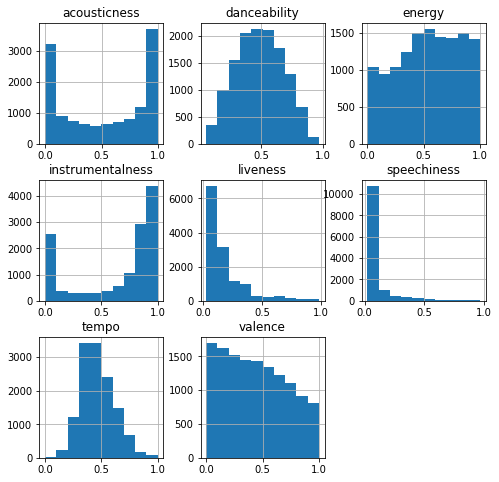

In [7]:
audio_features.hist(figsize=(8,8))


Above we see that each audio feature is distributed differently. Danceability and Tempo appear somewhat normally distributed. Speechiness and Liveness Pareto distribution. Acousticness and Instrumentalness have tails on the extreme ends. Energy and Valence are roughly evenly distributed. 

## Correlation Between Audio Features
Below, we look at a heat map detailing the cross-correlations among each audio features to see the extent to which each audio feature is correlated with one another.

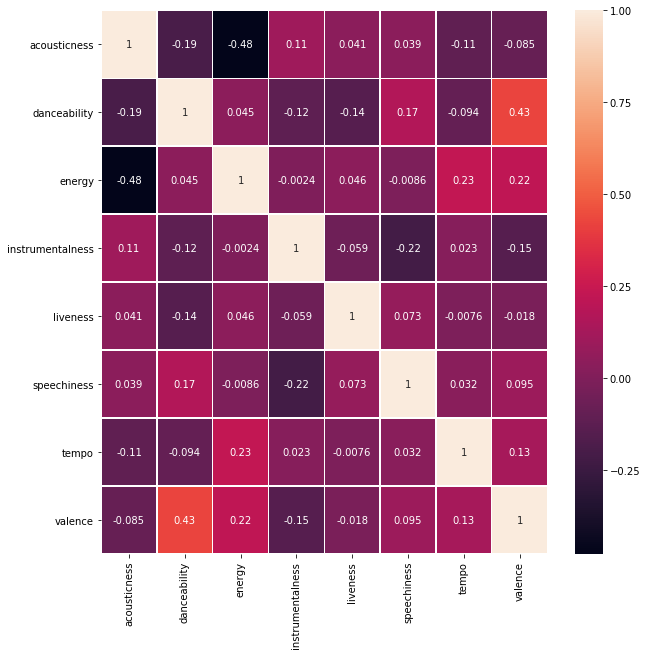

In [8]:
plt.figure(figsize=(10,10))
corr = audio_features.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True,
           linewidth=0.5)
plt.savefig('audio_heatmap.png')

In [9]:
abs(corr) > 0.3

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
acousticness,True,False,True,False,False,False,False,False
danceability,False,True,False,False,False,False,False,True
energy,True,False,True,False,False,False,False,False
instrumentalness,False,False,False,True,False,False,False,False
liveness,False,False,False,False,True,False,False,False
speechiness,False,False,False,False,False,True,False,False
tempo,False,False,False,False,False,False,True,False
valence,False,True,False,False,False,False,False,True


### Commentary
The heatmap shows some noteworthy (|correlation| > 0.3) relationships:
- Acousticness vs. Energy (-0.48). The higher the acousticness, the lower the energy.
- Danceability vs. Valence (0.43). The more danceable a track is, the higher valence/happier it tends to be.


### Calculating P-Values
Assume that we have a null-hypothesis that states that each audio feature is independent. The alternative hypothesis is that for each audio feature, another audio feature is correlated in some way.

The result above shows significant relationships betweena Acousticness vs. Energy and Danceability vs. Valence, so the p-values of note will be for those values.

In [10]:
from scipy.stats import pearsonr
import pandas as pd
# Function taken from: https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

calculate_pvalues(audio_features)

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
acousticness,0,0,0,0,0,0,0,0
danceability,0,0,0,0,0,0,0,0
energy,0,0,0,0.7823,0,0.3219,0,0
instrumentalness,0,0,0.7823,0,0,0,0.0084,0
liveness,0,0,0,0,0,0,0.386,0.0404
speechiness,0,0,0.3219,0,0,0,0.0002,0
tempo,0,0,0,0.0084,0.386,0.0002,0,0
valence,0,0,0,0,0.0404,0,0,0


Looking at the p-values for Acousticness vs. Energy and Danceability vs. Valence, we see a p-value that doesn't register above > 0.05, so we can reject the null hypothesis for those two relationships. 


### Plotting Distribution of Audio Features By Genre (All)
Below are some scatter plots that lay out the all the songs and see if there are any distinct groupings when grouped by genres and plotted across select features. The plots below show some interesting distributions by genre that match everyday musical intuition. 

In [11]:
df.sort_values('genres_top', inplace=True)

In [12]:
n_genres = len(df['genres_top'].unique())

Text(0.5,1,'Energy vs. Acousticness')

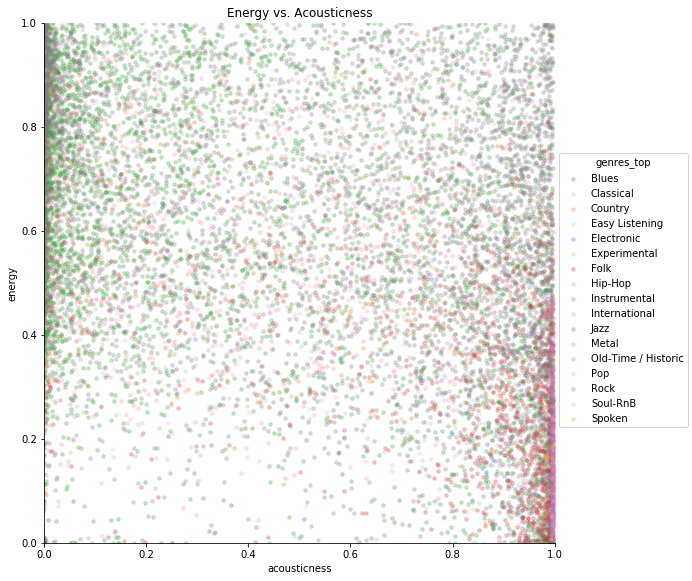

In [13]:
sns.lmplot(data=df, x="acousticness", y="energy", hue="genres_top", palette='tab20',
           fit_reg=False, legend=True, size=8, scatter_kws={'alpha':0.25, 's':12})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Energy vs. Acousticness")
#sns.set_palette('Set3', n_colors=n_genres)

The upper left corner (high energy, low acousticness) is crowded by Electronic.  The lower left corner (high acousticness, low energy) is a hotspot for folk & old-time music. 

Text(0.5,1,'Instrumentalness vs. Acousticness')

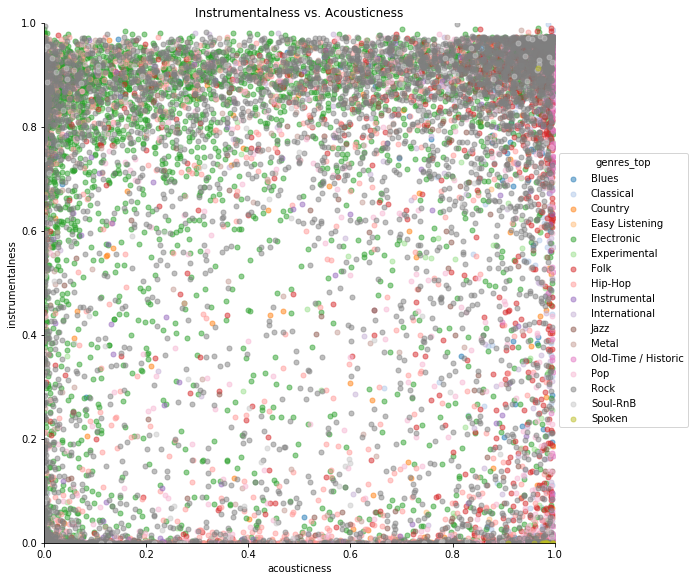

In [14]:
sns.lmplot(data=df, x="acousticness", y="instrumentalness", hue="genres_top", palette="tab20",
           fit_reg=False, legend=True, size=8, 
           scatter_kws={'alpha':0.5, 's':25})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Instrumentalness vs. Acousticness")

The upper left (High instrumentalness, low acousticness) is dominated by Electronic music, while the upper right (high instrumentalness and acousticness) is dominated by Rock. Clusters of folk can also be found in this region. 

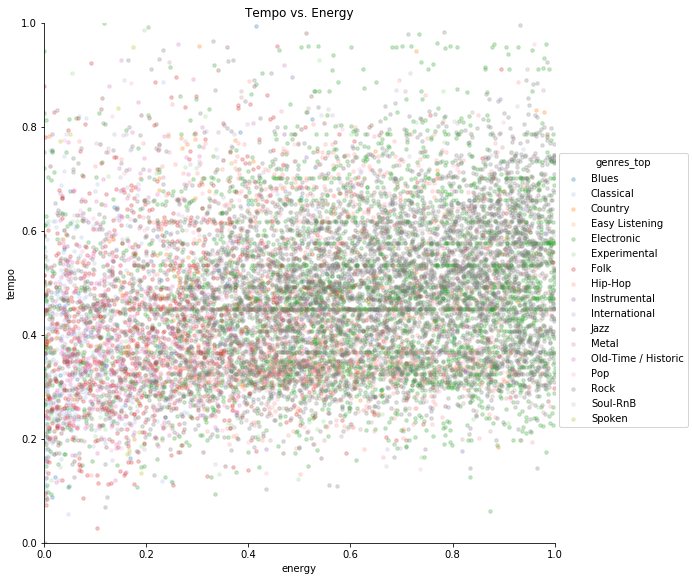

In [23]:
sns.lmplot(data=df, x="energy", y="tempo", hue="genres_top", palette="tab20",
           fit_reg=False, legend=True, size=8,
          scatter_kws={'alpha':0.25, 's':12})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Tempo vs. Energy")
plt.savefig('tempo_v_energy.png')

Among these set of plots, this one shows some of the clearer distinctions between genre clusters. The left region (low energy, mid-tempo) consists mostly of folk and old-time historic. As energy increases to the right, more rock and electronic songs show up. 

Text(0.5,1,'Danceability vs. Valence')

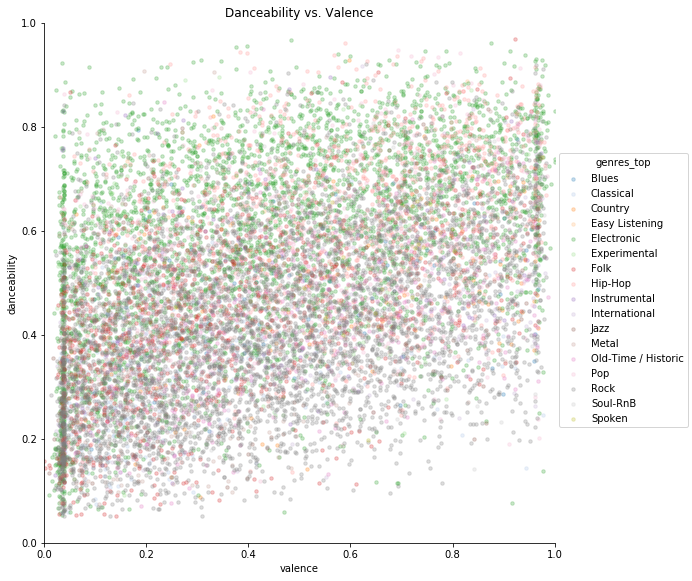

In [16]:
sns.lmplot(data=df, x="valence", y="danceability", hue="genres_top", palette="tab20",
           fit_reg=False, legend=True, size=8,
          scatter_kws={'alpha':0.25, 's':12})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Danceability vs. Valence")

Genres seem to have valences across all values, but the dividing line seems to cross at danceability ~ 0.5. On top, Electronic dominates, while the bottom is dominated by Rock, inidcating that across all happiness levels, Electronic is more danceable that Rock. There's also a subtle increasing trend; as valence increases, danceability increases. 

Text(0.5,1,'Valence vs. Energy')

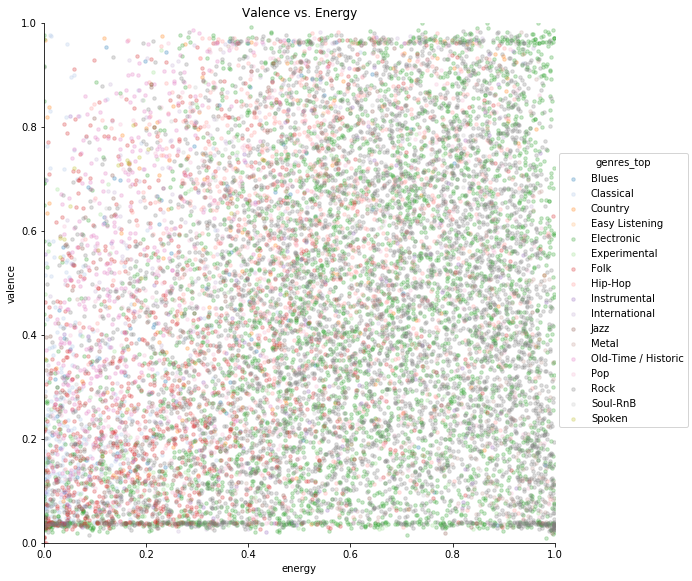

In [17]:
sns.lmplot(data=df, x="energy", y="valence", hue="genres_top", palette="tab20",
           fit_reg=False, legend=True, size=8, 
          scatter_kws={'alpha':0.25, 's':12})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Valence vs. Energy")

Folk, Instrumentals, and Pop seem to have low energy but are happier, while Rock and Electronic songs tend to be more energetic and distributed along many valence/happiness levels. 

#### Plotting each track is messy!
The scatter plots suggest some relationships between features and genres but are still hard to decipher. What if we sample a few genres at a time?

### Box-Plots of Audio Features By Genre

In [18]:
### Create a sample of 300 songs from each top genre
k = 6
sample_size = 300
top_k_genres = df.genres_top.value_counts().index.values[:k]
top_k_genres = sorted(top_k_genres)
df_sample = pd.DataFrame()
for genre in top_k_genres:
    df_sample = pd.concat([df.loc[df.genres_top==genre].sample(sample_size, random_state=1986), df_sample])
df_sample.genres_top.value_counts()

Pop           300
Hip-Hop       300
Metal         300
Rock          300
Folk          300
Electronic    300
Name: genres_top, dtype: int64

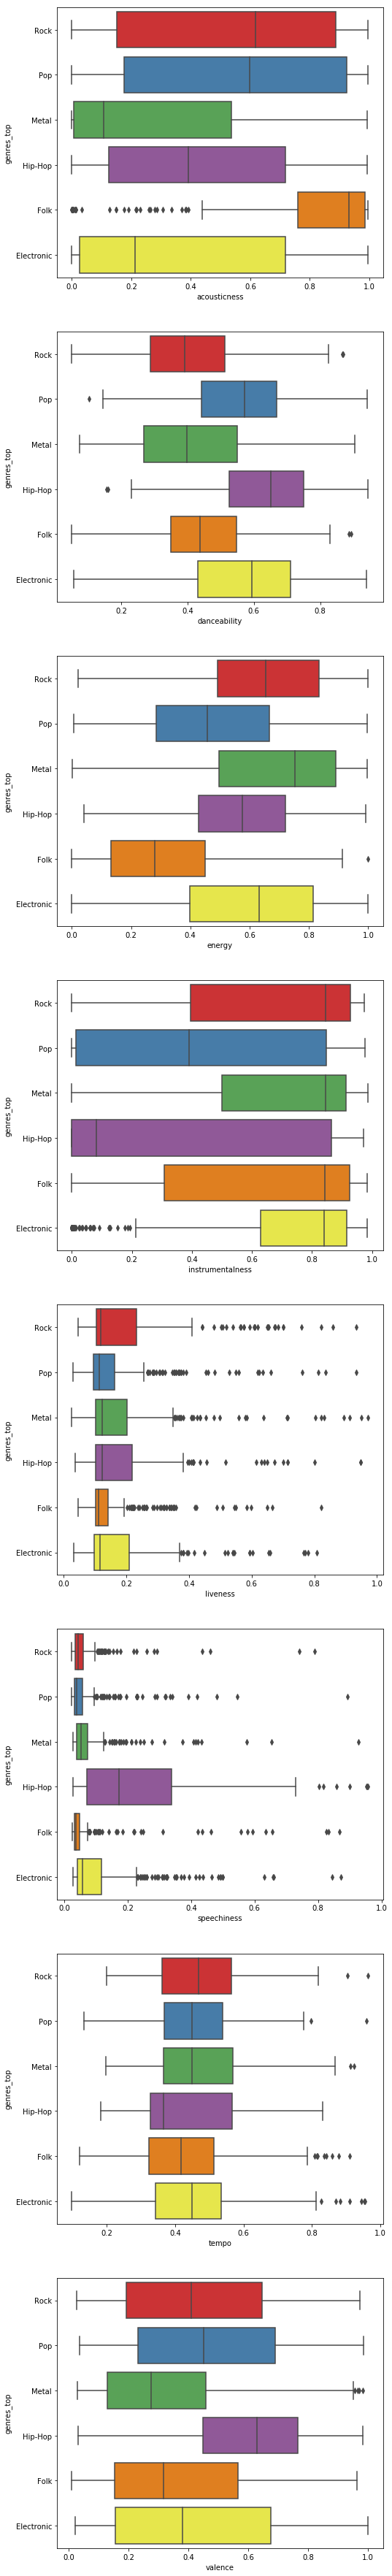

In [19]:
audio_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
n_features = len(audio_cols)

fig, axes = plt.subplots(n_features, 1, figsize=(8,8*n_features))

for i in range(n_features):
    ax = axes[i]
    feature = audio_cols[i]
    sns.boxplot(x=feature, y='genres_top', data=df_sample, ax=ax, palette='Set1')


#### Remarks
- **Acousticness**:
    - Metal typically scores low even though the music is heavily reliant on stringed instruments (guitars and bass). This outlines another possible feature that could be useful if extracted: distortion.
    - Folk's distribution is centered towards high acousticness scores (not surprising) but has plenty of outliers that score low.
    - Rock's distribution spans through a large chunk of the available range.
- **Danceability**:
    - For the most part, each genre centers around medium values for danceability.
- **Energy**:
    - Folk's distribution contrasts how it score in acousticness, visibly clustering at lower values than other genres. This is partly
- **Instrumentalness**:
    - The distribution for Metal and Electronic are eerily similar, scoring high in instrumentalness with plenty of outliers at low values. 
    - Metal, Folk, Electronic, and Rock all have lower quartiles that extend far past the mean relative to the upper quartile. One way to interpret this is that songs in these genres typically have strong instrumental sounds, but there's a significant minority of songs within these genres where instrumentals are much less prominent. 
- **Liveness**:
    - Plenty of outliers all around. This is a weird audio feature that is track-specific, signifying if the track sounds like it's live or not. There isn't much insight on a per-genre basis because this is dependent on the sample of tracks that happen to be live given a genre.
- **Speechiness**:
    - To nobody's surprise, A genre that is mostly centered around vocals (Hip-Hop) vastly outscore all genres in speechiness.
    - Other genres typically score low but have plenty of outliers outside of its upper quartiles.
- **Tempo**:
    - Each genre seems to share roughly the same distribution here, with some outliers with high tempos. I'm willing to bet those Rock outliers are actually Punk songs.
- **Valence**:
    - Hip-Hop takes the honor for happiest genre of this sample. 
    - Metal on the other hand is the saddest / angriest genre of the sample, though there are some outliers that score extremely high. 

### Plotting Audio Feature Distribution By Genre (Sample)

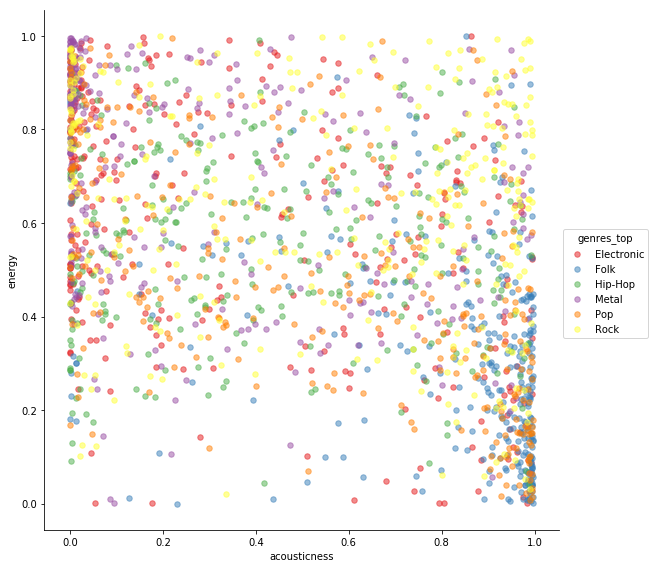

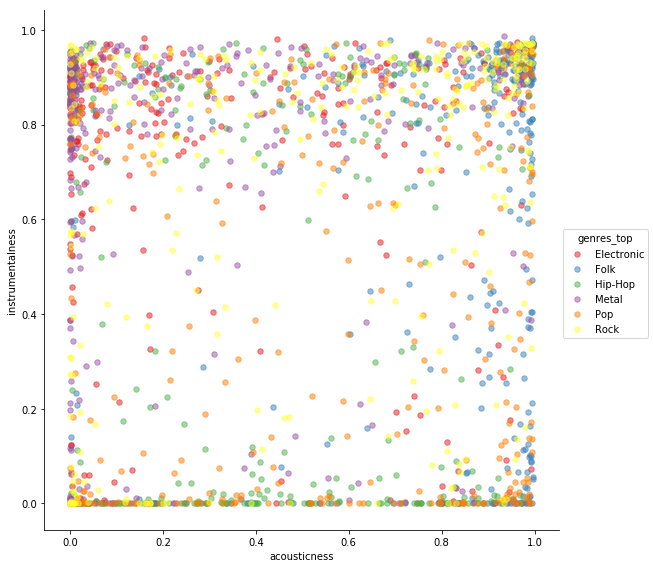

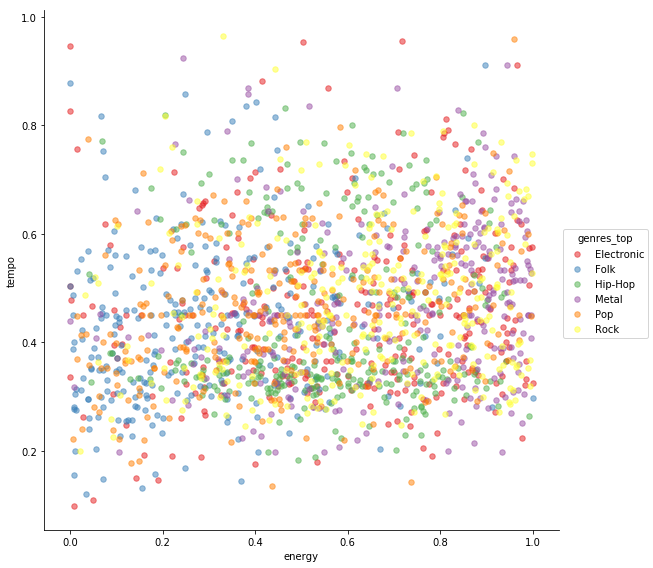

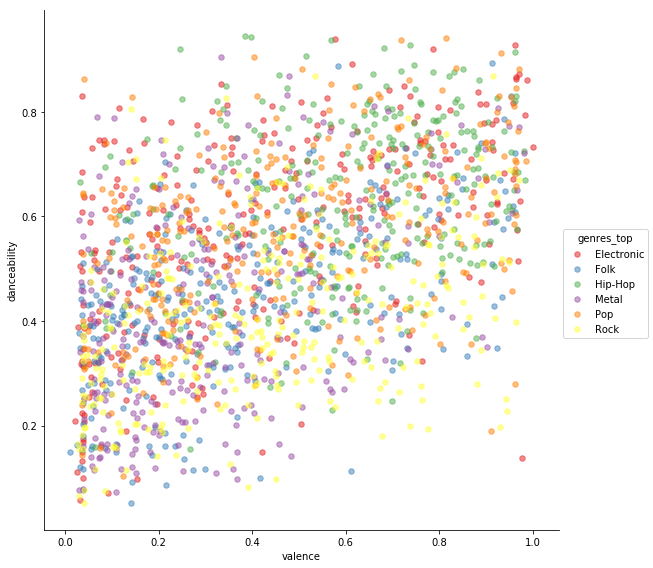

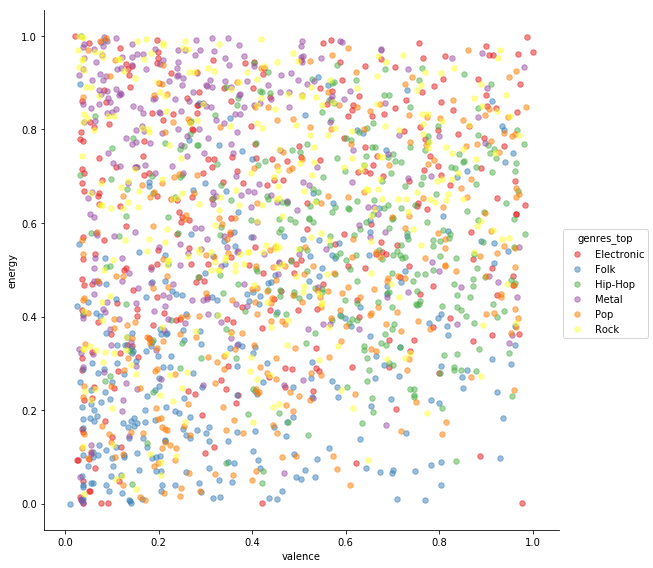

In [20]:
import itertools

### For all audio combos
# audio_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
# audio_cols.remove('liveness')
# audio_combos = list(itertools.combinations(audio_cols, 2))

### Select few audio combos
audio_combos = [('acousticness', 'energy'), 
                ('acousticness', 'instrumentalness'), 
                ('energy', 'tempo'), 
                ('valence', 'danceability'),
              ('valence', 'energy'),
               ]

#audio_genre_combos = list(itertools.combinations(audio))
df_sample.sort_values('genres_top', inplace=True)
for x, y in audio_combos:
    sns.lmplot(data=df_sample, x=x, y=y, hue="genres_top", palette='Set1',
           fit_reg=False, legend=True, size=8, scatter_kws={'alpha':0.5, 's':30})

The relationships between genres and features are about as messy as before, even when controlling sample sizes such that each genre has the same amount. Boxplots are a much better way to show feature distribution for this dataset.

### Plotting Audio Feature Relationship By Genre
The next part is to visualize how two audio features relate to each other when separated by genre. For example, we generally expect that acousticness decreases as energy increases as shown above. But are these general trends more prominent in some genres than others?

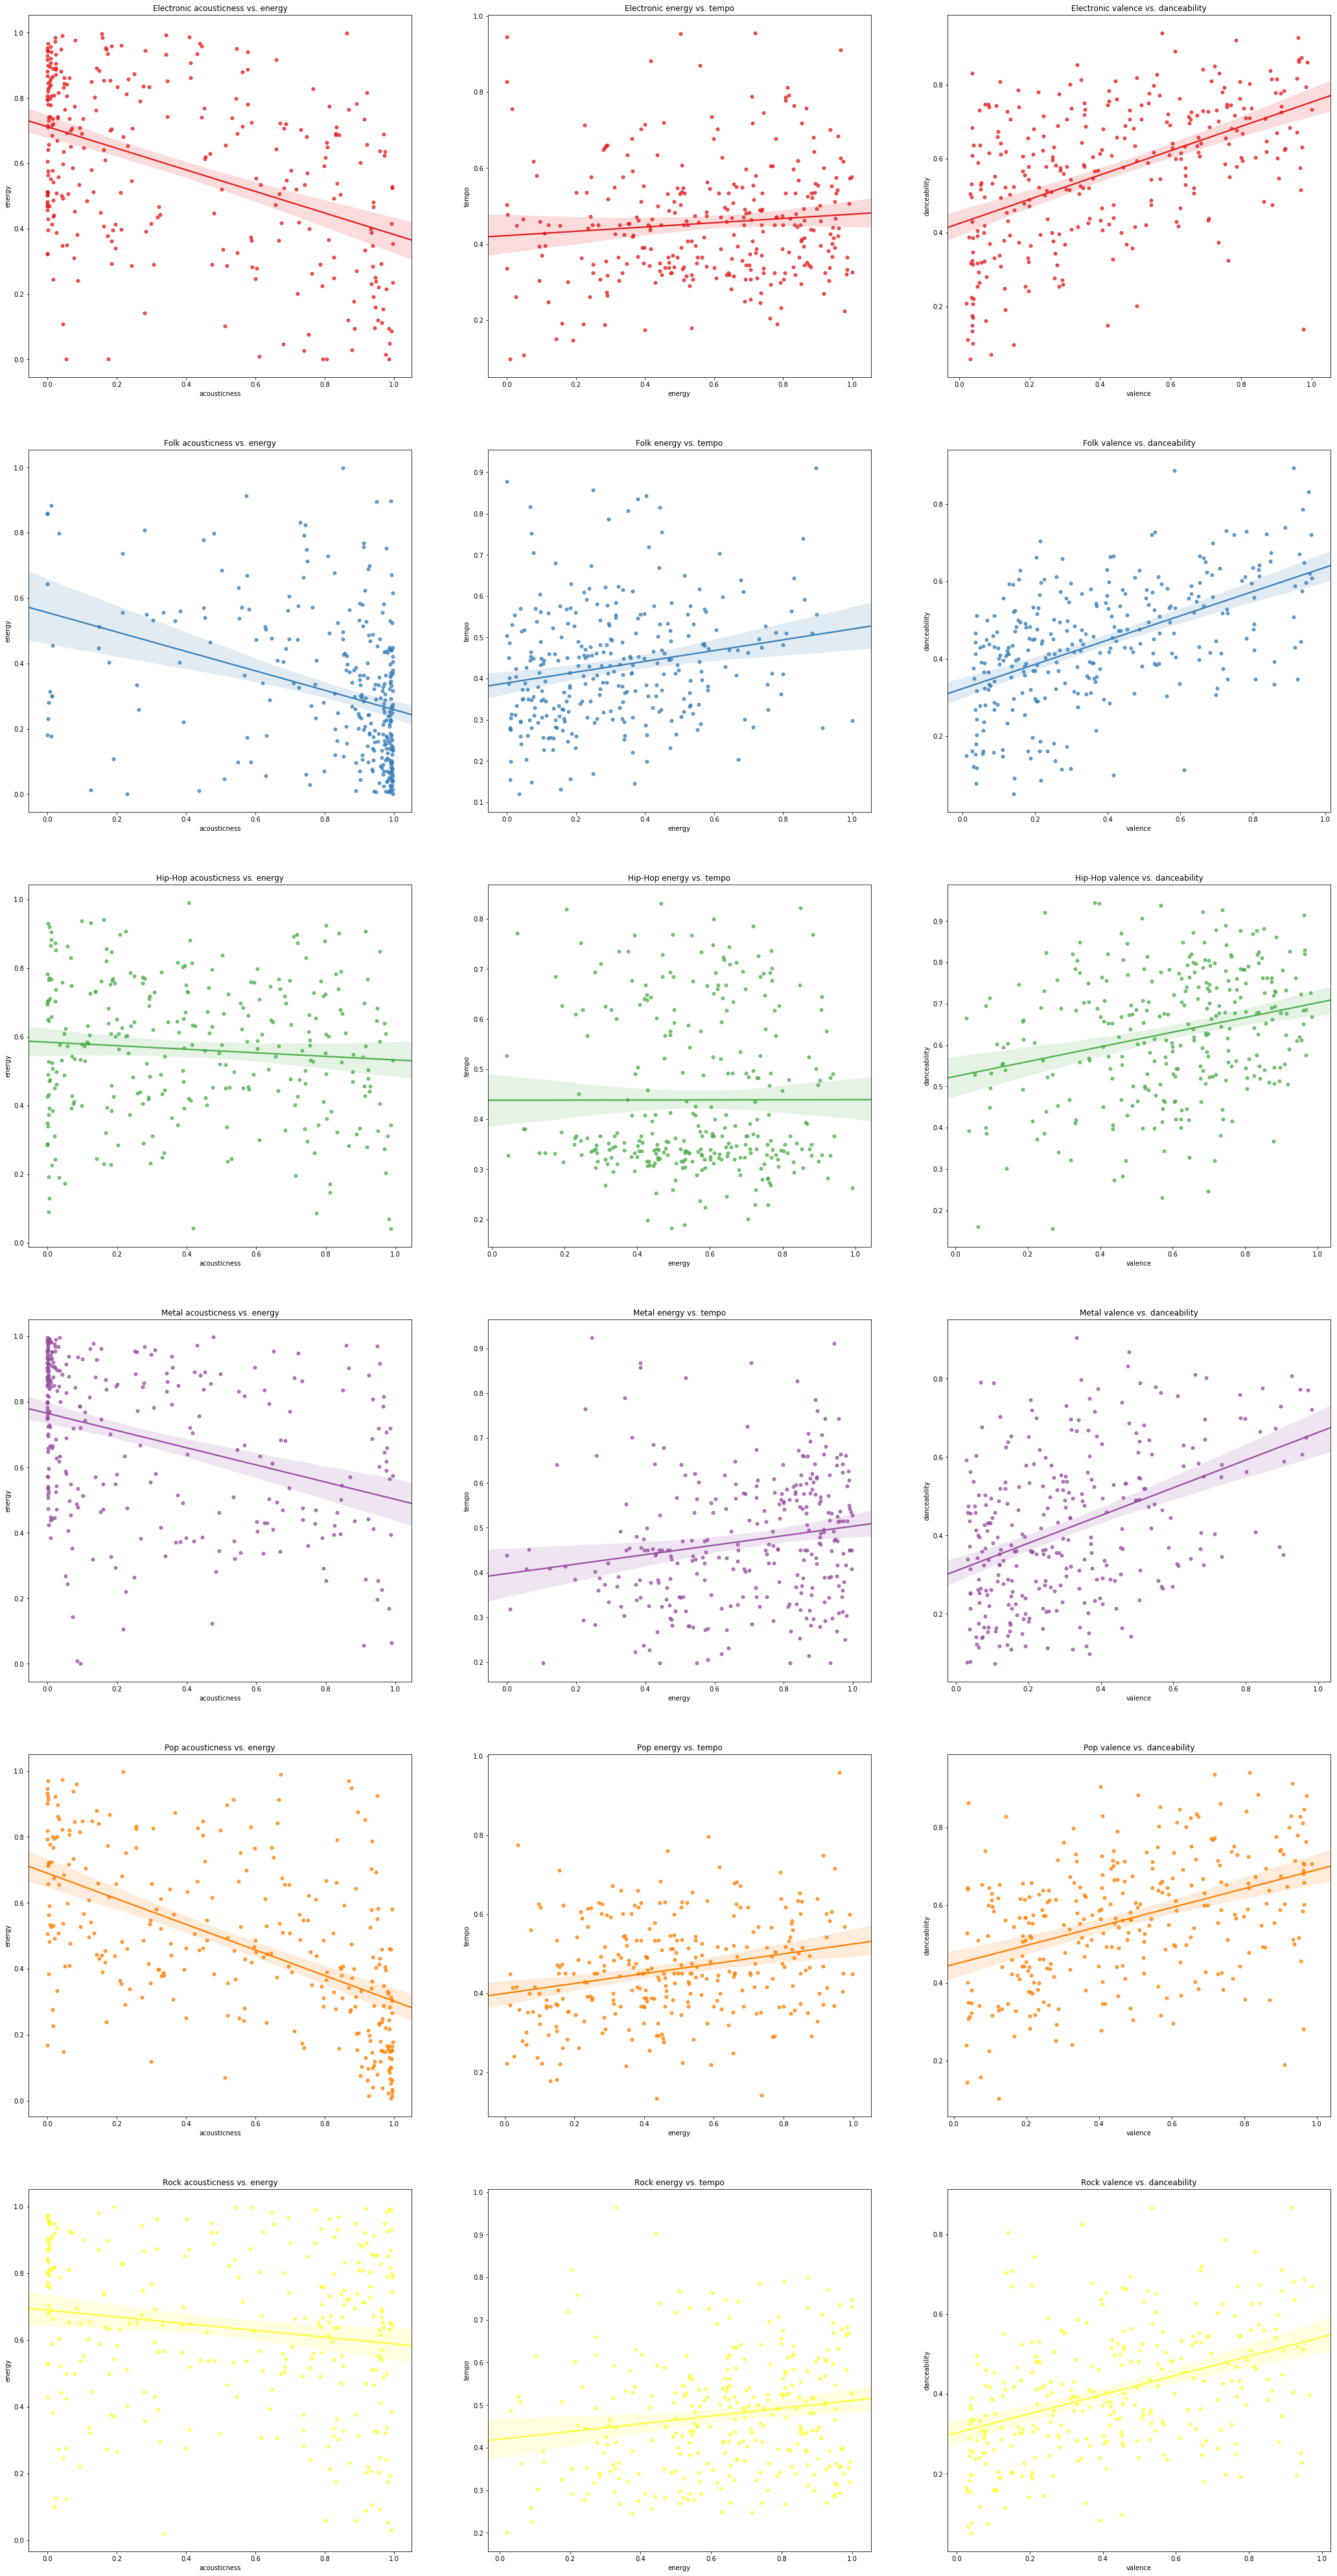

In [22]:

n_audio_combos = len(audio_combos)
k = len(top_k_genres)
fig, axes = plt.subplots(k, n_audio_combos)
fig.set_figheight(12*k)
fig.set_figwidth(12*n_audio_combos)
audio_combos = [('acousticness', 'energy'), 
                ('energy', 'tempo'), 
                ('valence', 'danceability'),
               ]
colors = sns.color_palette('Set1')[:k]

for i in range(n_audio_combos):
    x,y = audio_combos[i]
    
    for j in range(k):
        genre = top_k_genres[j]
        ax = axes[j,i]
        sns.regplot(data=df_sample[df_sample.genres_top==genre], x=x, y=y, color=colors[j],
                                  fit_reg=True, scatter_kws={'alpha':0.75, 's':25},
                   ax=ax)
        ax.set_title('{} {} vs. {}'.format(genre,x,y))

#### Remarks
- **Acousticness vs. Energy**: Hip-Hop and Rock are roughly flat, indicating that neither feature relate that much to one another. Electronic, Folk, Metal, and Pop show a downward trend, indicating that energy goes down with acousticness
- **Tempo vs. Energy**: Fit lines were flat across the board. This is surprising to me because I expect that energy increases as partially as a result of tempo increasing. The faster the song, the more 'energetic' it should sound. 
- **Valence vs. Danceability**: Positive correlation across the board; the happier a song is, the more 'danceable' it is. The sharpest trends are in Pop, Folk, and Electronic. 